IMPORTING MODULES

In [3]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

In [4]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/asselnuraliyeva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import re, string 
import pandas as pd 
from time import time  
from collections import defaultdict
import spacy

In [6]:
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from gensim.models import Word2Vec
from matplotlib import pyplot as plt
%matplotlib inline

READING CSV FILE

In [7]:
df = pd.read_csv('bbc-text.csv')

In [8]:
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    # Remove a sentence if it is only one word long
    if len(text) > 2:
        return ' '.join(word for word in text.split() if word not in STOPWORDS)

df_clean = pd.DataFrame(df.text.apply(lambda x: clean_text(x)))

In [10]:
df_clean.head()

,text
0,tv future hands viewers home theatre systems p...
1,worldcom boss left books alone former worldcom...
2,tigers wary farrell gamble leicester say rushe...
3,yeading face newcastle fa cup premiership side...
4,ocean twelve raids box office ocean twelve cri...


In [11]:
nlp = spacy.load('en', disable=['ner', 'parser']) 
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

df_clean["text_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['text']), axis=1)

In [12]:
df_clean.head()

,text,text_lemmatize
0,tv future hands viewers home theatre systems p...,tv future hand viewer home theatre system plas...
1,worldcom boss left books alone former worldcom...,worldcom boss leave book alone former worldcom...
2,tigers wary farrell gamble leicester say rushe...,tigers wary farrell gamble leicester say rush ...
3,yeading face newcastle fa cup premiership side...,yeade face newcastle fa cup premiership side n...
4,ocean twelve raids box office ocean twelve cri...,ocean twelve raid box office ocean twelve crim...


In [13]:
df_clean['text_lemmatize_clean'] = df_clean['text_lemmatize'].str.replace('-PRON-', '')

In [14]:
sentences = [row.split() for row in df_clean['text_lemmatize_clean']]
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

25892

In [15]:
sorted(word_freq, key=word_freq.get, reverse=True)

['say',
 'mr',
 'year',
 'would',
 'make',
 'also',
 'people',
 'new',
 'one',
 'take',
 'go',
 'get',
 'could',
 'use',
 'good',
 'game',
 '£',
 'last',
 'time',
 'first',
 'world',
 'come',
 'government',
 'two',
 'see',
 'show',
 'play',
 'company',
 'film',
 'uk',
 'tell',
 'work',
 'firm',
 'want',
 'give',
 'add',
 'well',
 'may',
 'back',
 'us',
 'think',
 'win',
 'like',
 'number',
 'include',
 'service',
 'way',
 'music',
 'market',
 'many',
 'month',
 'country',
 'plan',
 'player',
 'set',
 'labour',
 'next',
 'week',
 'party',
 'report',
 'bbc',
 'look',
 'three',
 'big',
 'sale',
 'minister',
 'home',
 'need',
 'election',
 'call',
 'million',
 'help',
 'expect',
 'day',
 'rise',
 'technology',
 'find',
 'know',
 'second',
 'mobile',
 'start',
 'group',
 'still',
 'part',
 'england',
 'top',
 'much',
 'end',
 'since',
 'right',
 'claim',
 'high',
 'move',
 'phone',
 'blair',
 'offer',
 'try',
 'lead',
 'become',
 'award',
 'put',
 'share',
 'public',
 'run',
 'record',
 'ch

In [16]:
# min_count: minimum number of occurrences of a word in the corpus to be included in the model.
# window: the maximum distance between the current and predicted word within a sentence.
# size: the dimensionality of the feature vectors
# workers: I know my system is having 4 cores, 
w2v_model = Word2Vec(min_count=200,
                     window=5,
                     size=100,
                     workers=4)

In [17]:
# this line of code to prepare the model vocabulary
w2v_model.build_vocab(sentences)

In [146]:
# train word vectors
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_model.iter)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


(966499, 2384980)

In [2]:
corpus = df['text']
print(corpus)

NameError: name 'df' is not defined

In [119]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)
print(vocabulary)

<class 'list'>
['tv', 'future', 'hand', 'home', 'system', 'digital', 'video', 'move', 'live', 'way', 'people', 'different', 'five', 'year', 'time', 'accord', 'consumer', 'show', 'new', 'technology', 'one', 'lead', 'programme', 'content', 'network', 'company', 'broadband', 'service', 'device', 'personal', 'like', 'us', 'uk', 'allow', 'record', 'play', 'want', 'much', 'also', 'set', 'big', 'business', 'japan', 'take', 'europe', 'program', 'put', 'mean', 'term', 'well', 'although', 'concern', 'raise', 'grow', 'happen', 'today', 'see', 'month', 'bbc', 'tell', 'news', 'website', 'issue', 'lose', 'yet', 'important', 'talk', 'rather', 'say', 'firm', 'add', 'challenge', 'hard', 'president', 'group', 'find', 'could', 'book', 'search', 'help', 'may', 'work', 'young', 'use', 'control', 'gadget', 'old', 'know', 'get', 'mr', 'suggest', 'end', 'already', 'possible', 'available', 'market', 'many', 'launch', 'build', 'even', 'hour', 'microsoft', 'chief', 'bill', 'announce', 'call', 'pc', 'mobile', 'in

Here we can see that there is no word "America/america". So, I used word "american"

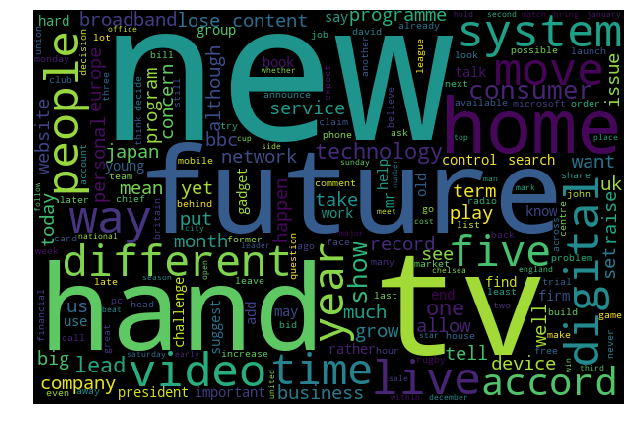

In [147]:
# visualizing our vocab with a word cloud.
from wordcloud import WordCloud
# Generate a word cloud image for positive reviews
str=''
for strings in vocab:
     str=str+strings+' '
polarity_pos_wordcloud = WordCloud(width=600, height=400).generate(str)
plt.figure( figsize=(9,9))
plt.imshow(polarity_pos_wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

In [148]:
# Create the model
w2v_model.init_sims(replace=True)

In [149]:
# Explore the model
w2v_model.wv.most_similar(positive=['america'])

[('album', 0.9220451712608337),
 ('top', 0.918769896030426),
 ('band', 0.9147202372550964),
 ('series', 0.9057263135910034),
 ('success', 0.9004889130592346),
 ('record', 0.8875259160995483),
 ('performance', 0.8708581328392029),
 ('award', 0.8687580227851868),
 ('star', 0.8633074760437012),
 ('winner', 0.8625044822692871)]

In [150]:
# Visualizing the model
def tsne_plot(model, wordToFind):
    "Create TSNE model and plot it"
    labels = []
    tokens = []
    
    tokens.append(model[wordToFind])
    labels.append(wordToFind)

    for word, value in model.wv.most_similar(positive=[wordToFind]):
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10))
    plt.scatter(x[0],y[0], c='#ff0000')
    plt.annotate(labels[0],
                     xy=(x[0], y[0]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    for i in range(1, len(x)):
        plt.scatter(x[i],y[i], c='#000000')
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [151]:
w2v_model.wv.vocab

{'tv': <gensim.models.keyedvectors.Vocab at 0x1a226c3550>,
 'future': <gensim.models.keyedvectors.Vocab at 0x1a291039b0>,
 'hand': <gensim.models.keyedvectors.Vocab at 0x1a23663898>,
 'home': <gensim.models.keyedvectors.Vocab at 0x1a23663160>,
 'system': <gensim.models.keyedvectors.Vocab at 0x1a23663588>,
 'digital': <gensim.models.keyedvectors.Vocab at 0x1a23663b00>,
 'video': <gensim.models.keyedvectors.Vocab at 0x1a236639e8>,
 'move': <gensim.models.keyedvectors.Vocab at 0x1a236639b0>,
 'live': <gensim.models.keyedvectors.Vocab at 0x1a23663390>,
 'way': <gensim.models.keyedvectors.Vocab at 0x1a23663ac8>,
 'people': <gensim.models.keyedvectors.Vocab at 0x1a23663fd0>,
 'different': <gensim.models.keyedvectors.Vocab at 0x1a23663f98>,
 'five': <gensim.models.keyedvectors.Vocab at 0x1a23663f60>,
 'year': <gensim.models.keyedvectors.Vocab at 0x1a23663e10>,
 'time': <gensim.models.keyedvectors.Vocab at 0x1a23663828>,
 'accord': <gensim.models.keyedvectors.Vocab at 0x1a23663c18>,
 'consumer

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


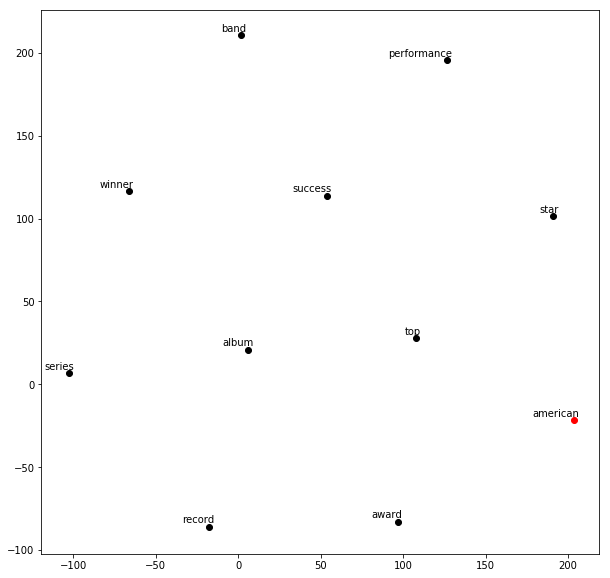

In [152]:
# 10 most similar words to "american"
tsne_plot(w2v_model, 'american')